Muchas veces necesitamos poder joinear Dataframe y por lo cual , pandas tiene muchas opciones para hacerlo

Vamos a ver algunas de las opciones



In [1]:
#Extraccion de Python Data Science book para explicar ejemplo
class dami_display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

# Merge

[Merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) Es una funcion que ayuda mucho a poder joinear dataframe , casi con un mismo pensamiento a como si utilizaras SQL



## Utilizando una key automatica , sin definirla

In [2]:
import pandas as pd

#generamos dos DAtaframe con datos
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

#verificamos como quedan
dami_display('df1', 'df2')


,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


Ahora con esos DataFrame debemos emepzar a evaluar como unirlos ,  a priori podemos utilizar el automatismo de reconocimiento de la funcion , donde podra encontar la columna employee como algo en comun


In [3]:
df3 = pd.merge(df1, df2)
dami_display('df1','df2','df3')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

Pero que pasa si queremos joinear pero de diferente manera , es decir en vez de usar un one to one , ahora puede ser que tengamos multiples valores para un joinea

*Many to one*

In [4]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

df3_4 = pd.merge(df3, df4)
dami_display('df3', 'df4', 'df3_4')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

df3_4
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

## Utilizando una key de joineo expecifica

Podemos joinear por nombre de columnas o por indices entre dos dataframes


In [5]:
#mergeo de dataframe segun columna , utilizamos on

dami_display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

si tenemos diferents nombres en los Dataframe pero vemos que podemos mergea , utilizamos los parametros left_on y right_on



In [6]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
dami_display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

## Seteo de joineo de Dataframe

en el mismo foramto que se puede hacer en SQL o en la teoria de conjunto , nosotros podemos jugar con toda las estrucutra de inner , left , right y outer joins

### Inner join

el Merge tiene un parametros *how* que es quien indica que tipoo de mergeo queres entre dos DataFrame. El default es inner

In [7]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
dami_display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [8]:
dami_display('df6', 'df7', "pd.merge(df6, df7, how='outer')")


df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [9]:
dami_display('df6', 'df7', "pd.merge(df6, df7, how='right')")


df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='right')
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer

In [10]:
dami_display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

# concat

Librearia para concatenacion de dataframe , tengamos en cuenta que aqui importa mucho los indices dado que no podemos determinar que tipo de key de joineo utilizar

In [11]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)



## concatenacion por filas

    


In [12]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])


In [13]:
dami_display('df1', 'df2')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4


In [14]:
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [15]:
dami_display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


#concatenacion por columnas



In [16]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])

df_concat_col = pd.concat([df3, df4], axis=0)


dami_display('df3', 'df4', "df_concat_col")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

df_concat_col
     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
0  NaN  NaN   C0   D0
1  NaN  NaN   C1   D1

In [17]:
#indices duplicados
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
dami_display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [18]:
pd.concat([x,y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [22]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

df_inner = pd.concat([df5, df6], join='outer', axis=0)
dami_display('df5', 'df6', 'df_inner')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

df_inner
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

#Ejercicio

Se debe basjar estos datos de manera que queden guardados en el colab utilizando curl

1 - Utilizando merge

*   outer join entre dataframe abb y areas
*   left join entre pop y resultado del anterior (ojo aqui hay diferentes keys para joinear)



2- chequear y plotear los datos nulos del dataframe resultante antes, utilizando librearia missingo y el plot debe ser con la funcion matrix


In [23]:
# Following are shell commands to download the data
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   181k      0 --:--:-- --:--:-- --:--:--  181k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   3987      0 --:--:-- --:--:-- --:--:--  3995
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   3378      0 --:--:-- --:--:-- --:--:--  3379


In [24]:
import pandas as pd

pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abb = pd.read_csv('state-abbrevs.csv')



#Resolucion del ejercicio


In [26]:
dami_display('abb', 'pop', 'areas')

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [28]:
resultado =pd.merge(abb, areas, how='outer')
resultado

,state,abbreviation,area (sq. mi)
0,Alabama,AL,52423
1,Alaska,AK,656425
2,Arizona,AZ,114006
3,Arkansas,AR,53182
4,California,CA,163707
5,Colorado,CO,104100
6,Connecticut,CT,5544
7,Delaware,DE,1954
8,District of Columbia,DC,68
9,Florida,FL,65758


In [29]:
resultado= pd.merge(abb, areas, on='state', how='outer')
resultado

,state,abbreviation,area (sq. mi)
0,Alabama,AL,52423
1,Alaska,AK,656425
2,Arizona,AZ,114006
3,Arkansas,AR,53182
4,California,CA,163707
5,Colorado,CO,104100
6,Connecticut,CT,5544
7,Delaware,DE,1954
8,District of Columbia,DC,68
9,Florida,FL,65758


In [30]:
resultado_final= pd.merge(pop, resultado, left_on= 'state/region', right_on='abbreviation', how='left')
resultado_final

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,AL,52423.0
1,AL,total,2012,4817528.0,Alabama,AL,52423.0
2,AL,under18,2010,1130966.0,Alabama,AL,52423.0
3,AL,total,2010,4785570.0,Alabama,AL,52423.0
4,AL,under18,2011,1125763.0,Alabama,AL,52423.0
...,...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN,NaN


In [31]:
!pip install missingno

In [32]:
import missingno as msno

<Axes: >

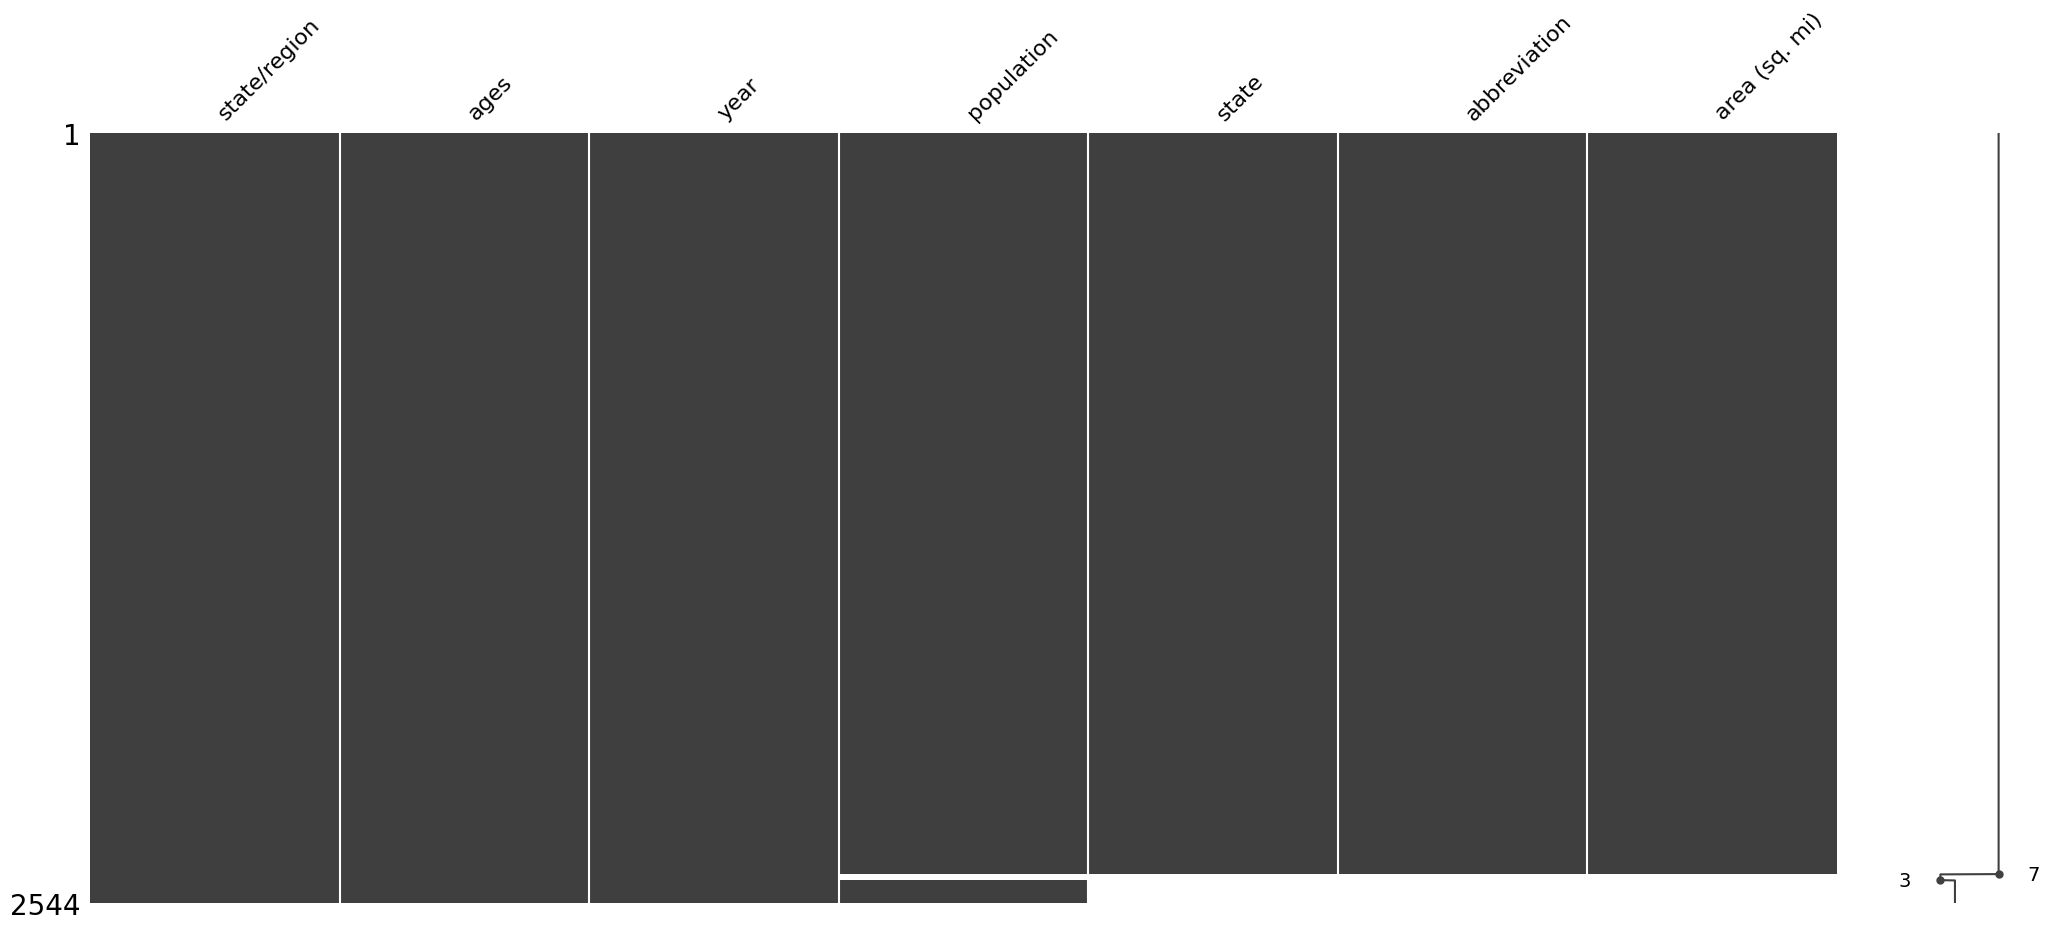

In [33]:
msno.matrix(resultado_final)